<a href="https://colab.research.google.com/github/ulugeyik/toucanpi/blob/main/toucanpiISSdata1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#26/05/2022 Received AstroPi data from ISS. 
#This notebook is for carrying out general analysis of the data, getting an overview
# ToucanPi Team. Planned by Turgut Durduran

# Background

*ToucanPi Team*: Tom, Gaia, Iris, *Mentor*: Turgut Durduran

Received AstroPi data from ISS on 26/05/2022.

We took our notes and did the data analysis on Google Collaboratory which is a variation of Jupyter Notebooks for Python.

For our reference, our proposal was:

https://docs.google.com/document/d/1tRh2XLnBJGWedzcRTN1zl6BEyqQuF9Lw2TORBe4ebC4/edit?usp=sharing


The following hypotheses were meant to be verified or refuted with the data we acquired:

* H1: The sensors on AstroPi - inertial measurement unit, in particular accelerometer, gyroscope - can be utilized to separate different directions of acceleration and identify the strength of the earth’s gravitational pull on the ISS.
* H2: The distance from the earth’s core is the main determinant for the strength of gravity which we have calculated to be 8.7 cm2/sec. It will not depend on the path of the ISS since the height of the ISS is approximately constant throughout.
* H3: Similar considerations are true for the magnetic field except that if we end up recording over the South Atlantic anomaly, we will see a strong change in the magnetic field.

Our methodology was described as (references kept in original document):


---


"Our main goal is to log data about the position of the ISS [6] and the data from the IMU sensors [7] at regular intervals. Our current plan is average data from one second of measurements and log the mean/median and the standard deviation.  This will give us measurements of three axes of acceleration (x,y,z of unknown orientation relative to AstroPi placement), six axis of movement (yaw, pitch, roll, x, y, z  relative to AstroPi placement) and three axes of the  magnetic field (x, y, z relative to AstroPi placement)  strength. In addition to this, we will log a timestamp from the real-time clock. We will experiment with the simulator and the physical AstroPi before preparing the final program in order to fine-tune this information.

There is no on-board sensor to locate the ISS precisely over the earth. Instead, we will use the method described in Ref. [6]. In order to relate these findings to the structures over the earth, for example, a tall mountain may affect the gravitational [11] or magnetic fields, we will also record visible light images from the camera at regular intervals. As described in the risk mitigation procedures, we will also use the images to determine the velocity of the ISS.  In order not to be overwhelmed with the amount of information, we will record at about one image/per second. We will replace night-time images which may be dark with estimated images from satellite imagery, e.g. Google Earth, based on position approximation.  This will also be fine-tuned before submission.

The data will be logged in csv files [8] and our calculations show that we will be way below the 3Gb limit. One important consideration is to define the resolution for the HQ Camera module so as not to pass this limit.  We will use previous data-sets, e.g. Ref. [8], to practice how to analyze and represent the data. Of particular interest will be the evolution of independent axes and vector sums of these parameters over time, representation of them over positions over the earth and either automatic or manual detection of special events, e.g. if a boost [4] occurs.

We plan to utilize Python and associated libraries that are allowed for use on the AstroPi for both the script that will run on the AstroPi and also for analyzing the calculated data.
"



---

# Analysis 
**Step 1**

The First step is to figure out how to get the data into "Google Collaboratory" notebook. The files should reside remotely. 

We tried two options:
1. Using the "upload option" which turned out to require that the action is taken everytime the notebook is loaded. Since our datafile is large, that was not fun!
2. Other option was to upload the file on Google Drive and use that. This seems to require an authorization everytime the notebook is loaded which may not be ideal for sharing the notebook. 

*We will look  into the best option.*

In [36]:
# Option 1
# The following part is needed in order to upload a data file.
# It requires that I turn on third part cookies
#solution: https://github.com/googlecolab/colabtools/issues/17
#once it has been uploaded I can comment it out.
#info: https://medium.com/towards-data-science/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
#from google.colab import files
#uploaded = files.upload()
#for loading data on google collaboratory
#import pandas as pd
#import io
#mydata = pd.read_csv(io.BytesIO(uploaded['toucandata_20220513_201103.csv']),parse_dates={ 'newdate': ['Date/Time'] })

#this options is annoying because it seems to require that I keep uploading for every sessions.

In [37]:
# Code to read csv file into Colaboratory from google drive:
# The above link seems outdated, updated one is
#https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/
#!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link='https://drive.google.com/file/d/1P5RZMVeQMj-4LJr1XM0yQOQ6e00SkvzM/view?usp=sharing'
 
# to get the id part of the file
id = link.split("/")[-2]
print (id) # Verify that you have everything after 'd/' 
downloaded = drive.CreateFile({'id':id})
myfilename = 'toucandata_20220513_201103.csv'
downloaded.GetContentFile(myfilename) 


1P5RZMVeQMj-4LJr1XM0yQOQ6e00SkvzM


In [38]:
#For loading data on google collaboratory using Option 2:
import pandas as pd
mydata = pd.read_csv(myfilename,parse_dates={ 'newdate': ['Date/Time'] })


**Step 2:**  Photos


*   406 photos were sent.
*   To take a quick look we did an animated gif using linux tools: 
   " ffmpeg  -framerate 10 -pattern_type glob -i '*.jpg' -r 15 -vf scale=512:-1 out.gif "
* Initial impressions: (1) land not visible in most photos, (2) perhaps we took photos too infrequently.
* Email received: 
Good afternoon

We thought you might like to know that during team Toucan Pi's experiment, **Canadarm 2** crossed the window of the ISS. ESA have let us know that this occurred on 73 of 406 images. 

I hope this does not affect your analysis. *You are one of only two teams that captured this during the challenge this year!* 

best

Sam
Astro Pi Team
* **What is Canadarm 2?** **ADD TO REPORT** https://www.nasa.gov/mission_pages/station/structure/elements/remote-manipulator-system-canadarm2/
* https://www.asc-csa.gc.ca/eng/iss/canadarm2/default.asp
* **NOTE**: See if something happens to accelaration, magnetic field, orientation when this arm is opened! 
*  201856 - 202107 , 205209-205355, **215507-215930** , 220142  some land visible. 
* 215653 220142 -- this is a nice crossing accross Australia. We may be able to find this distance precisely using the latitude/longitude information from our photos!

Okay, we have some interesting photos, let's get the distance between two photos and we can find the time.

Let's take a look at the log file,  "toucanevents_20220513_201103.log".

We see that 215653 file is the 1205 th data point. Whereas 220142 is 1260th data file. So we will now look at the data get the time for these, get the latitude and longitude and see the distance travelled during this time.

In [39]:
#to get speed of ISS from our location and time data
import geopy.distance #this allows calculation of distance from latitude and longitude
#Find time difference between 1205 and 1260
duration = mydata.newdate[1260]-mydata.newdate[1205]
duration = duration.total_seconds()
distance = geopy.distance.geodesic((mydata.Lat[1260],mydata.Long[1260]),(mydata.Lat[1205],mydata.Long[1205])).km
speed = distance/duration
print('Speed:', speed,'km/s', '  Mean duration:', duration,'s', '  Mean distance:', distance,'km')
print('Literature 7.66 km/s')
#Alternatives , e.g. if duration is mistaken due to file writing, our goal was 5 seconds
print('Speed (alt):', distance/((1260-1205)*5),'km/s')


Speed: 6.893167151108577 km/s   Mean duration: 289.055774 s   Mean distance: 1992.5097661750647 km
Literature 7.66 km/s
Speed (alt): 7.245490058818417 km/s


Pretty good result. Our finding, 7.24 km/s based on the known time between data acquisition (5 seconds) is quite close to the literature value of 7.66 km/s. 

Source: https://en.wikipedia.org/wiki/International_Space_Station [Last Accessed: 30/05/2022].

We can do the same for every point and plot it on the world map.

In [40]:
#for maths,plots and other things
# First used pyplot which is great but less interactive on the online notebook
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#if using plotly, this is more interactive.
import plotly.express as px
import plotly.graph_objs as go
#general
import numpy as np
import math

In [41]:
#to get speed of ISS from our location and time data
distance = np.empty([len(mydata)-1,1])
speed = np.empty([len(mydata)-1,1])
duration = np.empty([len(mydata)-1,1])
for i in range(len(mydata)-1):
  distance[i]=geopy.distance.geodesic((mydata.Lat[i],mydata.Long[i]),(mydata.Lat[i+1],mydata.Long[i+1])).km
  tmp=mydata.newdate[i+1]-mydata.newdate[i]
  duration[i]=tmp.total_seconds()
  speed[i]=distance[i]/duration[i]
  #print(speed[i])

print('Mean speed:', np.mean(speed),'km/s', '  Mean duration:', np.mean(duration),'s', '  Mean distance:', np.mean(distance),'km')
print('Literature 7.66 km/s')
#Alternatives , e.g. if duration is mistaken due to file writing, our goal was 5 seconds
print('Mean speed (alt):', np.mean(distance)/5,'km')



Mean speed: 6.8986752564046805 km/s   Mean duration: 5.271334642681124 s   Mean distance: 36.3656219409018 km
Literature 7.66 km/s
Mean speed (alt): 7.273124388180359 km



Now this does *not* use anything from the photos for calculating the speed.

In order to do that, we need to:
1. Calibrate the size of the photos. In other words, find out how many pixels correspond to 1 km. We will do this by finding some landmarks that we can identify on the photos as well as on Google Maps so we can compare the physical size ($d_{lm}$ [km] Google Maps) to the number of pixels on a photo ($d_{lmimg}$ [pixels]). We can do this multiple times for confirmation. Let's call this $d_{img}$ [km/pixels] where $d_{img}=d_{lm}/d_{lmimg}$. 
2. Then find out how many pixels ($d_{move}$ [pixels]) an easy to identify landmark, ideally a small one, moves between one or more frames. Since we know the time between each frame ($t_f$) and we can calibrate the distance using the above information, we can get the speed ($v_{img}$) as:  $~ v_{img} = d_{move}\times d_{img} / t_f$ [km/s].

Let's plot where ISS was during our recording. We will use this to identify some landmarks on the earth from the photos.

In [42]:
#show location, possibly wrong:
#to plot things on a world map, interactive, may be incorrect.
fig = px.scatter_geo(mydata,lat=mydata.Lat,lon=mydata.Long,hover_data=[mydata.newdate] )
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()


By zooming in and hovering over the points on the above map, we can figure out where we were when the photos were taken. The landmarks near Australia were quite obvious. Wellesley Islands are visible in 215653 and surrounding images. Below is an image on 215653 showing $d_{lm} =  30.03$ km. 

 

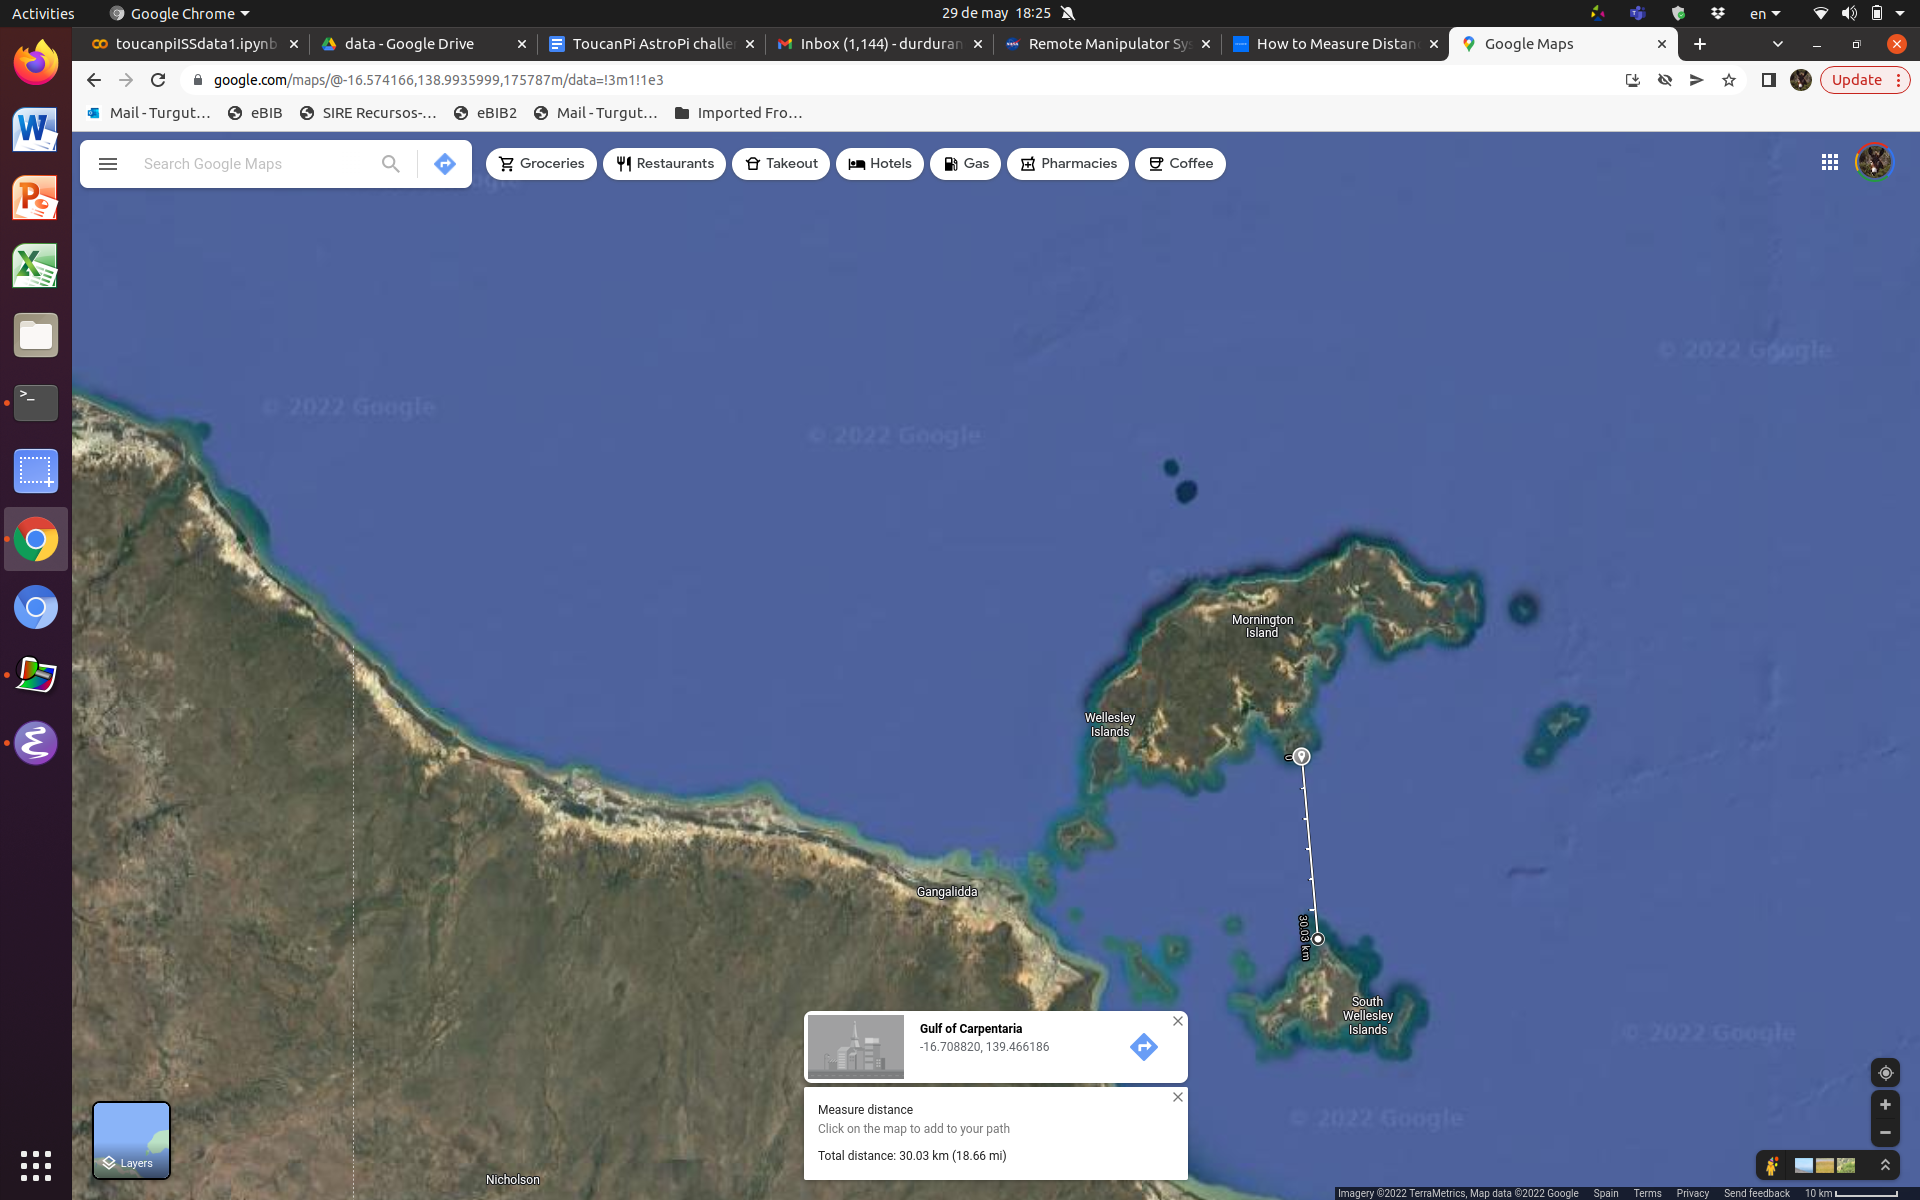

To do this, we have used instructions from here:
https://www.businessinsider.com/how-to-measure-on-google-maps

Now, we need to do the same on the photograph to find the number of pixels in between two points.
We used gimp to do this. Image is saved, will insert later.

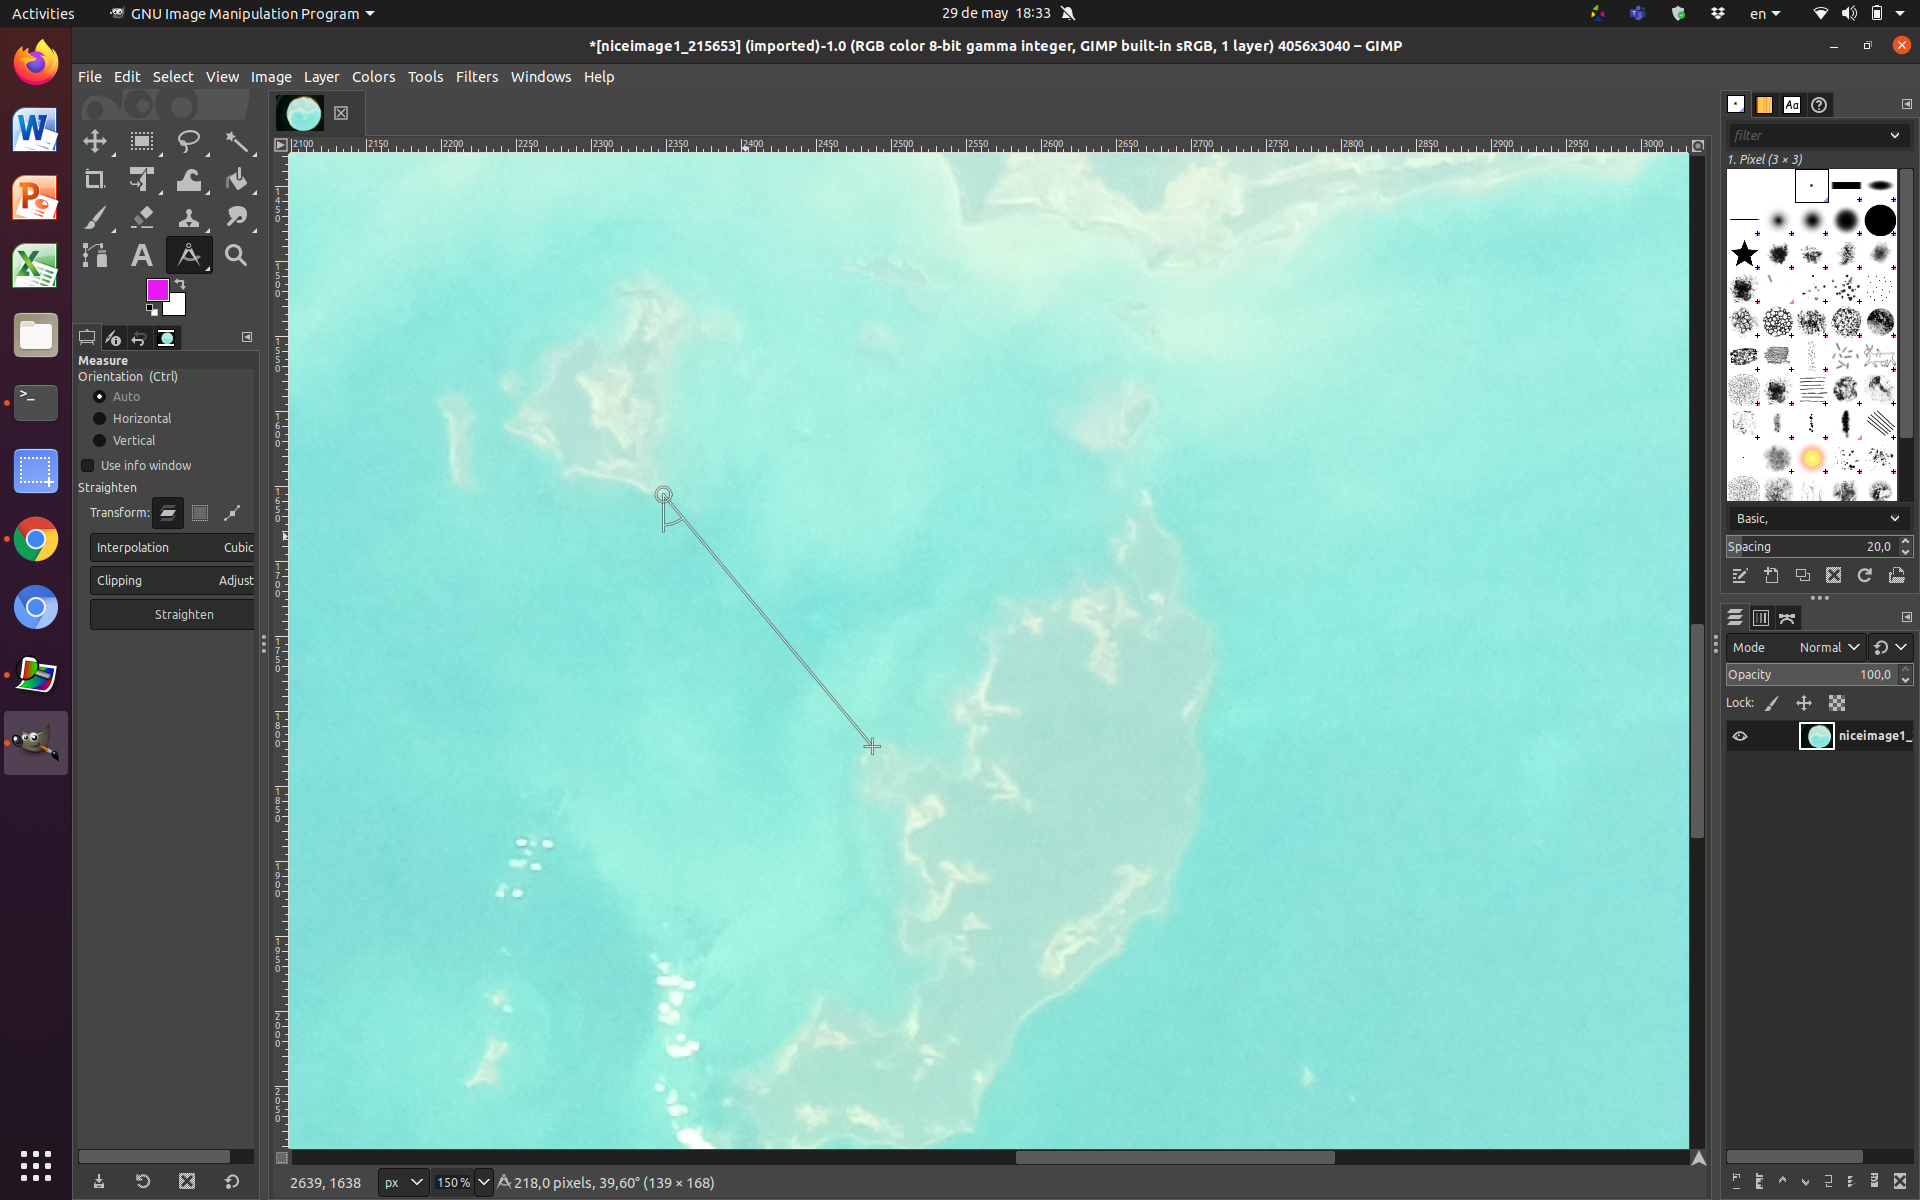

This gave $d_{lmimg}$ = 218 pixels.

In [43]:
#calculate number of kilometers/pixel
calibratedphoto = 30.03/218.0
print("Calibration distance: ", calibratedphoto, "[km/pixel]")

Calibration distance:  0.13775229357798166 [km/pixel]


We now have $d_{img}=0.138$. 

We will now find the change in pixels between two photos for several landmarks. This will allow us to measure speed of ISS from photos.

To do this, I loaded 215653 and 215626 into gimp as layers. Then made both desaturated (B&W photo), increased contrast, and was able to clearly see some clouds. Then I made the upper layer semi-transparent using Layers tool (CTRL-L) by sliding the opacity slider. After this, i measured the distance in pixels between two very visible points.

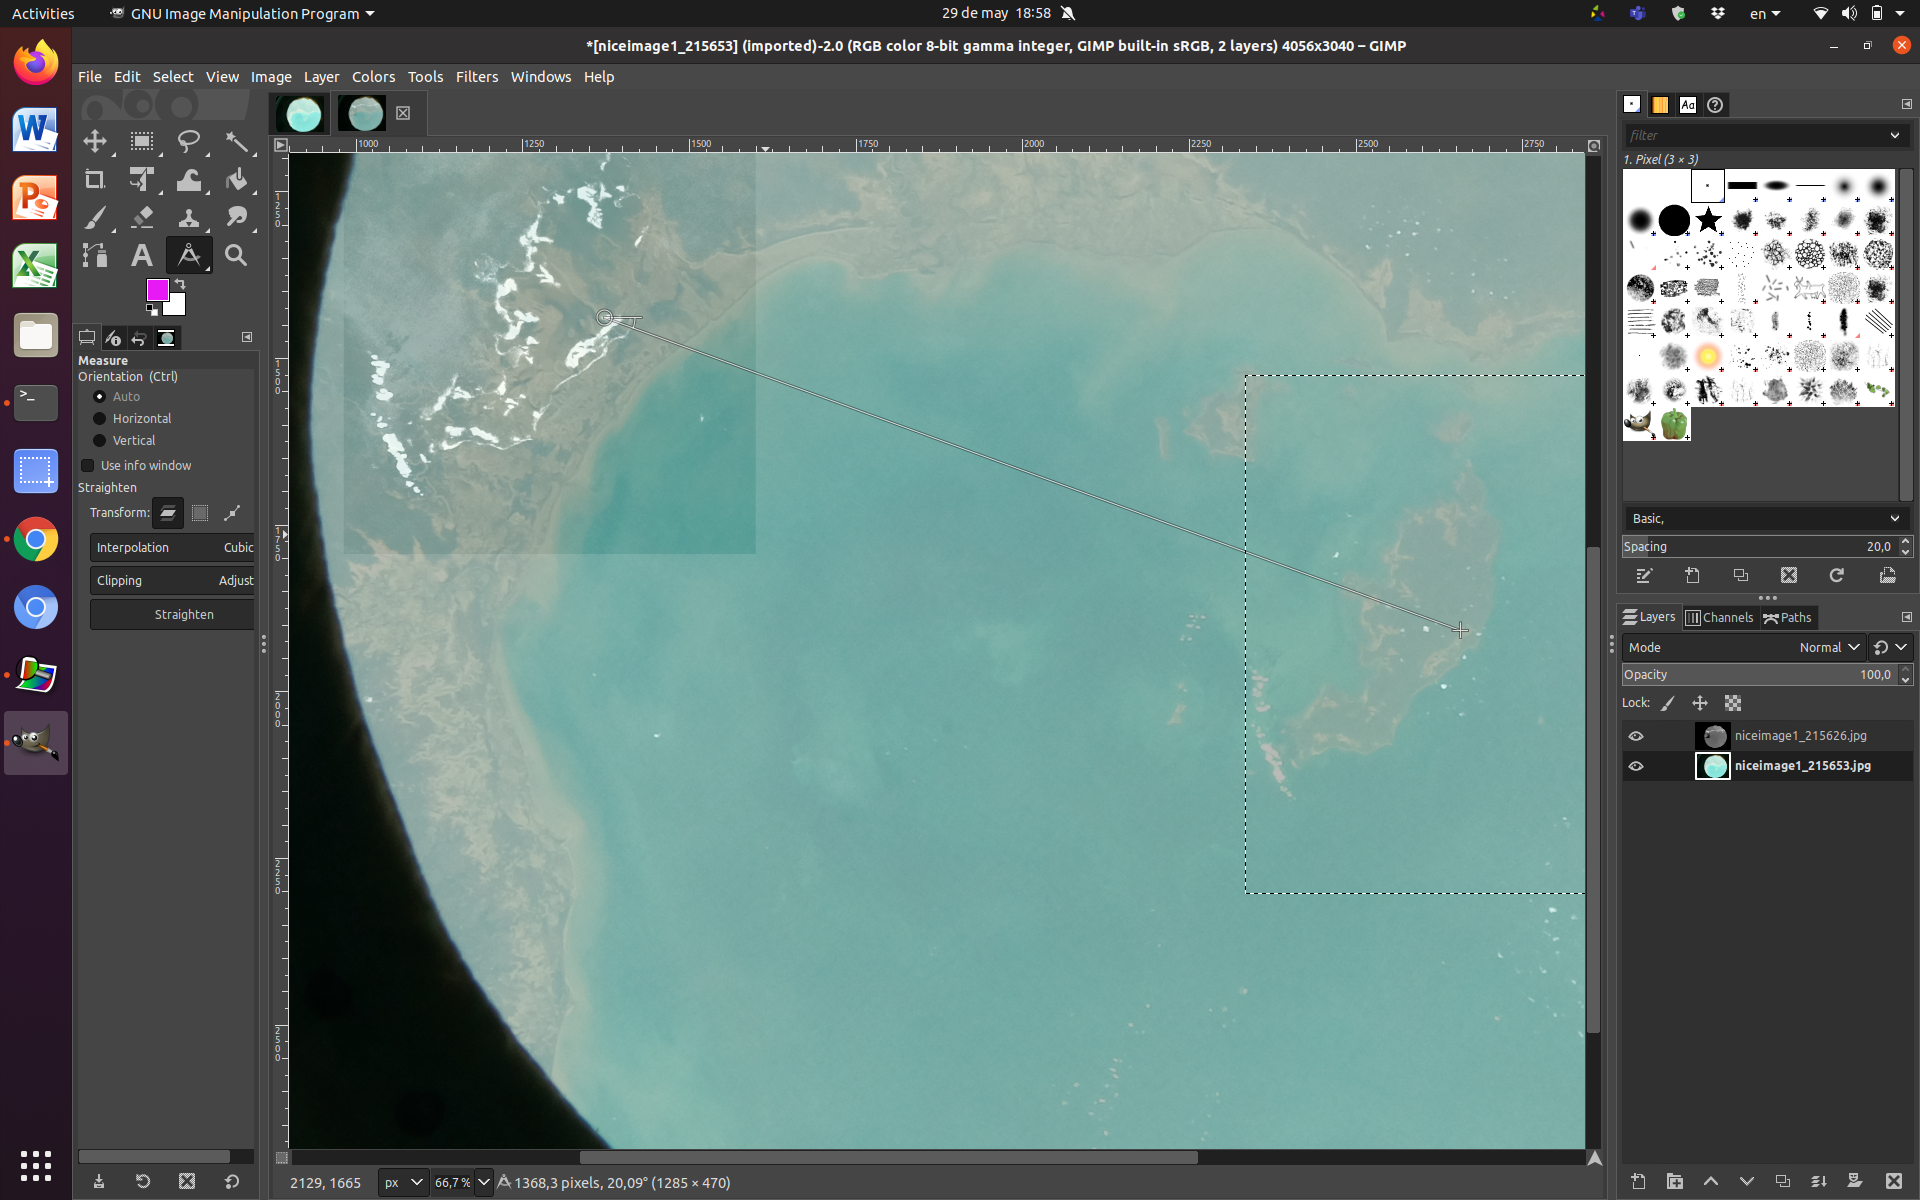

A small point on this island moved $d_{move}=1368$ pixels in $t_f = 25$ seconds which is the time between frames. 

In [44]:
#a point in this island moved 1368 pixels in 25 seconds
vimg= 1368/25*calibratedphoto
print("Speed from photo: ", vimg, "[km/s]")

Speed from photo:  7.537805504587157 [km/s]


This gives us $v_{img} = 7.53$ km/s which is very *close* to the true value of 7.66 km/s!

Now that we have different ways of estimating the speed of ISS, we can find out its distance from the earth using basic physics. As mentioned in our proposal, we rely on the following reference:
Mathematics of Satellite Motion https://www.physicsclassroom.com/class/circles/Lesson-4/Mathematics-of-Satellite-Motion Last accessed: 30/05/2022

We need a few constants:
* Mass of earth: $M_{earth} = 5.98 \times 10^{24}$ kg 
* Radius of earth: $R_{earth} = 6.37 \times 10^3$ km
* Gravitational constant: $G = 6.673 \times 10^{-20}$ km$^3$/kg/s$^2$.

Furthermore, $R_{total}=R_{ISS} + R_{earth}$ is the total distance of ISS to the center of the earth while $R_{ISS}$ is the height of the ISS from earth's surface.

Given this, the speed of ISS is

 $v_{ISS} = \sqrt{\frac{G M_{earth}}{R_{total}}}$ .

Therefore, 
 $R_{total} = \frac{G M_{earth}}{v_{ISS}^2}$ .

In [45]:
#define constants
Mearth= 5.98e24
Rearth= 6.37e3
G = 6.673e-20

In [46]:
# the distance of ISS to the center of the earth is calculated from photos as
Rimg = G*Mearth/vimg/vimg - Rearth
print("Height of ISS is:", Rimg, "[km]")

Height of ISS is: 653.1582486560374 [km]


The true height is ~400 km. Let us check with literature values.

In [47]:
Rtrue = G*Mearth/7.66/7.66 - Rearth
print("Height of ISS is:", Rtrue, "[km]")

Height of ISS is: 430.8746395435237 [km]


This value is very very close to the true value. We see that a small error in velocity leads to a large error in the estimated height due to the squared velocity. Therefore, it is probably a good idea for us to calculate velocity using different approaches. **NOTE** To do this combination.

Nevertheless, we have enough information that we have either calculated from our data or we know from the literature to find out the true gravitational pull at the ISS. In our proposal, we have promised to use this reference:
https://www.physicsclassroom.com/class/circles/Lesson-3/The-Value-of-g [Last Accessed 30/05/2022] .

We learn from that reference that the value of the acceleration of gravity at the ISS, $g_{ISS}$ is given by 

$g_{ISS} = G M_{earth}/ R_{total}^2$ .

For a check, we can find the known value, $g_{earth}$ at the surface of the earth, 9.81 m/s$^2$. 

In [48]:
gearth= G*Mearth/Rearth/Rearth
print("$g_earth$: ", gearth, "[km/s$^2$]" )

$g_earth$:  0.009834299810976195 [km/s$^2$]


In [49]:
gimg = G*Mearth/(Rimg+Rearth)/(Rimg+Rearth)
print("$g_iss$ from photos: ", gimg, "[km/s$^2$]" )

$g_iss$ from photos:  0.008090165394729261 [km/s$^2$]


The true value is 0.89 g or 8.68 m/s which is not too far away!

In [50]:
gtrueISS = G*Mearth/(400+Rearth)/(400+Rearth)
print("$g_iss$ from photos using true distance: ", gtrueISS, "[km/s$^2$]" )


$g_iss$ from photos using true distance:  0.008706527407168213 [km/s$^2$]


As expected, if we use the true height, we get a better result but we are not too far off! 

The gist of the story is that our findings confirm that there is a very strong pull of gravity on the ISS and the ISS has to maintain a proper velocity to match this pull. Otherwise, it will not stay on orbit!

**Step 3**: Take a general look at the data. 

In [51]:


# Just kept for Reference on how to use pyplot
#plot acceleration, acceleration intensity of the axis in Gs.
#this is using pyplot , matplotlib, limited interaction capabilities, specially in Junyper/Collaboratory
#plt.figure()
#plt.plot(mydata.newdate,np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ)))
#locator = mdates.AutoDateLocator()
#formatter = mdates.ConciseDateFormatter(locator)
#plt.gca().xaxis.set_major_locator(locator)
#plt.gca().xaxis.set_major_formatter(formatter)
#plt.show()


In [52]:
#one option kept for reference
# #plot acceleration, acceleration intensity of the axis in Gs.
# #this is using plotly, increased interaction capabilities, specially in Junyper/Collaboratory
# # examples: https://plotly.com/python/line-and-scatter/
# #labels: https://plotly.com/python/figure-labels/
# #hover stuff https://plotly.com/python/hover-text-and-formatting/
# #note: plotly express, pxline etc is more capable in terms of hover stuff but you cannot add individual objects
# #updates: https://plotly.com/python/creating-and-updating-figures/

# fig= go.Figure(px.line(x=mydata.newdate,y=np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ)),hover_data=[mydata.Lat,mydata.Long],markers=True,labels={
#                      "x": "Date/time",
#                      "y": "Acceleration [G]",
#                      "hover_data_0": "Latitude (o)",
#                      "hover_data_1": "Longitude (o)"
#                                       }))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccX,mode='lines+markers',name="Acceleration X"))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccY,mode='lines+markers',name="Acceleration Y"))
# fig.add_trace(go.Scatter(x=mydata.newdate,y=mydata.AccZ,mode='lines+markers',name="Acceleration Z"))
# fig.update_layout(title='Acceleration over time',showlegend=True,hovermode='x unified')
# fig.show()



In [53]:
#Hack for labels: https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li
newnames = {'AccX':'Acceleration X', 'AccY': 'Acceleration Y', 'AccZ': 'Acceleration Z','wide_variable_3': 'Acceleration Total','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(mydata,x='newdate',y=['AccX','AccY','AccZ',np.sqrt(np.square(mydata.AccX)+np.square(mydata.AccY)+np.square(mydata.AccZ))],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Acceleration over time',showlegend=True,yaxis_title="Acceleration [G]",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

In [54]:
newnames = {'MagnetX':'Magnetic F. X', 'MagnetY':'Magnetic F. Y','MagnetZ':'Magnetic F. Z','wide_variable_3': 'Magnetic F Total','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(mydata,x='newdate',y=['MagnetX','MagnetY','MagnetZ',np.sqrt(np.square(mydata.MagnetX)+np.square(mydata.MagnetY)+np.square(mydata.MagnetZ))],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Magnetic Field over time',showlegend=True,yaxis_title="$\\text{Magnetic Field} [\mu T]$",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


In [55]:
#is there a latitude/longitude dependence here?
newnames = {'MagnetX':'Magnetic F. X', 'MagnetY':'Magnetic F. Y','MagnetZ':'Magnetic F. Z','wide_variable_3': 'Magnetic F Total','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(mydata,x='newdate',y=['MagnetX','MagnetY','MagnetZ',np.sqrt(np.square(mydata.MagnetX)+np.square(mydata.MagnetY)+np.square(mydata.MagnetZ)),'Lat','Long'],markers=True))
fig.update_layout(title='Magnetic Field & Position over time',showlegend=True,yaxis_title="$\\text{Magnetic Field} [\mu T]$",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

In [56]:
#show location on map with yaw, possibly wrong:
fig = px.scatter_geo(mydata,lat=mydata.Lat,lon=mydata.Long,color=mydata.MagnetZ,hover_data=[mydata.newdate])
fig.update_layout(title = 'ISS trajectory over world map & total magnetic field', title_x=0.5,coloraxis_colorbar=dict(title="Magnetic Field [uT]"))
fig.show()

In [57]:

#plot gyro data, radians/second ("rotational intensity")
newnames = {'GyroX':'Gyro. X', 'GyroY':'Gyro. Y','GyroZ':'Gyro. Z','wide_variable_3': 'Gyro. Total','GyroTotal': 'Gyro. Total','Lat': 'Latitude', 'Long': 'Longitude'}
tmp={'newdate': mydata.newdate, 'GyroX': mydata.GyroX*180.0 / math.pi, 'GyroY': mydata.GyroY*180.0 / math.pi,'GyroZ': mydata.GyroZ*180.0 / math.pi, 'GyroTotal' : np.sqrt(np.square(mydata.GyroX)+np.square(mydata.GyroY)+np.square(mydata.GyroZ)),'Lat': mydata.Lat, 'Long': mydata.Long}
tmpdf = pd.DataFrame(data=tmp)
fig= go.Figure(px.line(tmpdf,x='newdate',y=['GyroX','GyroY','GyroZ','GyroTotal'],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Gyroscope data over time',showlegend=True,yaxis_title="$\\text{Gyroscope} [^o/s]$",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()



In [58]:
#plot orientation data
tmp={'newdate': mydata.newdate, 'OrientPitch': mydata.OrientPitch*180.0 / math.pi, 'OrientRoll': mydata.OrientRoll*180.0 / math.pi,'OrientYaw': mydata.OrientYaw*180.0 / math.pi, 'Lat': mydata.Lat, 'Long': mydata.Long}
tmpdf = pd.DataFrame(data=tmp)
newnames = {'OrientPitch':'Pitch', 'OrientRoll':'Roll','OrientYaw':'Yaw','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(tmpdf,x='newdate',y=['OrientPitch','OrientRoll','OrientYaw'],hover_data=['Lat','Long'],markers=True))
fig.update_layout(title='Orientation over time',showlegend=True,yaxis_title="Orientation [$^o$]",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()


# plt.figure()
# plt.plot(mydata.newdate,mydata.OrientPitch*180.0 / math.pi)
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.show()


# #plot orientation data
# plt.figure()
# plt.plot(mydata.newdate,mydata.OrientRoll*180.0 / math.pi)
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.show()



# #plot orientation data
# plt.figure()
# plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi)
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.show()



In [59]:

#yaw contains the most interesting information.
tmp={'newdate': mydata.newdate, 'OrientPitch': mydata.OrientPitch*180.0 / math.pi, 'OrientRoll': mydata.OrientRoll*180.0 / math.pi,'OrientYaw': mydata.OrientYaw*180.0 / math.pi, 'Lat': mydata.Lat, 'Long': mydata.Long}
tmpdf = pd.DataFrame(data=tmp)
newnames = {'OrientPitch':'Pitch', 'OrientRoll':'Roll','OrientYaw':'Yaw','Lat': 'Latitude', 'Long': 'Longitude'}
fig= go.Figure(px.line(tmpdf,x='newdate',y=['OrientYaw','Lat','Long'],markers=True))
fig.update_layout(title='Orientation & Position over time',showlegend=True,yaxis_title="[$^o$]",legend_title="Data type",xaxis_title="Date/Time",hovermode='x')
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])
                                     )
                  )
fig.show()

#plot orientation data
# plt.figure()
# plt.plot(mydata.newdate,mydata.OrientYaw*180.0 / math.pi, label='Yaw')
# plt.plot(mydata.newdate,mydata.Long,label='Longitude')
# plt.plot(mydata.newdate,mydata.Lat,label='Latitude')
# locator = mdates.AutoDateLocator()
# formatter = mdates.ConciseDateFormatter(locator)
# plt.gca().xaxis.set_major_locator(locator)
# plt.gca().xaxis.set_major_formatter(formatter)
# plt.gca().legend()
# plt.show()


In [60]:
#show location on map with yaw, possibly wrong:
fig = px.scatter_geo(mydata,lat=mydata.Lat,lon=mydata.Long,color=mydata.OrientYaw*180/math.pi,hover_data=[mydata.newdate])
fig.update_layout(title = 'ISS trajectory over world map & Yaw', title_x=0.5,coloraxis_colorbar=dict(title="Yaw [o]"))
fig.show()

In [61]:
#to get speed of ISS from our location and time data
import geopy.distance
distance = np.empty([len(mydata)-1,1])
speed = np.empty([len(mydata)-1,1])
duration = np.empty([len(mydata)-1,1])
for i in range(len(mydata)-1):
  distance[i]=geopy.distance.geodesic((mydata.Lat[i],mydata.Long[i]),(mydata.Lat[i+1],mydata.Long[i+1])).km
  tmp=mydata.newdate[i+1]-mydata.newdate[i]
  duration[i]=tmp.total_seconds()
  speed[i]=distance[i]/duration[i]
  #print(speed[i])

print('Mean speed:', np.mean(speed),'km/s', '  Mean duration:', np.mean(duration),'s', '  Mean distance:', np.mean(distance),'km')
print('Literature 7.66 km/s')
#Alternatives , e.g. if duration is mistaken due to file writing, our goal was 5 seconds
print('Mean speed (alt):', np.mean(distance)/5,'km')



Mean speed: 6.8986752564046805 km/s   Mean duration: 5.271334642681124 s   Mean distance: 36.3656219409018 km
Literature 7.66 km/s
Mean speed (alt): 7.273124388180359 km


**Step 4:** Further results based on subjective analysis


* Canadarm 2: Did it teach us anything?
* Some comments on photo frequency & quality? 
* Anything else from ddata analysis?


# Summary results & conclusions

# What did we learn?